# Machine learning project

Bautista Oliva for start2impact

---

## Dataset Wine 

### Discovery

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # For scaling dataset

#import os
#import tabulate as tb
#import warnings
#warnings. filterwarnings('ignore')
#setting the working directory to a folder in which all the datasets used in the project are.
#os.chdir("C:\\Users\\bauol\\Desktop\\Bautista\\Start2impact\\DataScience\\progettoDS_DataManVis\\" )

In [2]:
wine_dataset=datasets.load_wine()
X=wine_dataset.data
X_names=wine_dataset.feature_names
y=wine_dataset.target
y_names=wine_dataset.target_names
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

From the description provided we can see that:  
* The dataset is made of 13 attributes plus the target variable
- attributes are all numeric
- the target is categorical
- the dataset is made of 178 observations
- target classes are balanced (class_0 (59), class_1 (71), class_2 (48))
- attributes has heterogeneous order of magnitude (Mean of *Nonflavanoid Phenols* = 746, mean of *Nonflavanoid Phenols* = 0.36)
- there are no *missing values*  
- by checking max and min values there are no uncommon values

Anyway is better to check that that info is correct.

In [3]:
#First i'm trasforming X and y into a dataframe to make it easier to extract information.
df=pd.DataFrame(X,  columns=X_names)
df=pd.concat([df, pd.DataFrame(y)], axis=1)
#adjusting names in order to havee shorter labels in grapsh
df.rename(columns={"alcalinity_of_ash":"alcalinity_ash","total_phenols":"phenols","nonflavanoid_phenols":"nonflavanoid","color_intensity":"color","od280/od315_of_diluted_wines":"od280/od315",0: "target"}, inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,phenols,flavanoids,nonflavanoid,proanthocyanins,color,hue,od280/od315,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#Checking attributes
print("The shape of the dataset: number of rows + number of attribues (one is the target variable))")
print(df.shape)


The shape of the dataset: number of rows + number of attribues (one is the target variable))
(178, 14)


In [5]:
#Checking attributes format and missing values + setting target as categorical variable
df["target"]=pd.Categorical(df["target"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   alcohol          178 non-null    float64 
 1   malic_acid       178 non-null    float64 
 2   ash              178 non-null    float64 
 3   alcalinity_ash   178 non-null    float64 
 4   magnesium        178 non-null    float64 
 5   phenols          178 non-null    float64 
 6   flavanoids       178 non-null    float64 
 7   nonflavanoid     178 non-null    float64 
 8   proanthocyanins  178 non-null    float64 
 9   color            178 non-null    float64 
 10  hue              178 non-null    float64 
 11  od280/od315      178 non-null    float64 
 12  proline          178 non-null    float64 
 13  target           178 non-null    category
dtypes: category(1), float64(13)
memory usage: 18.5 KB
None


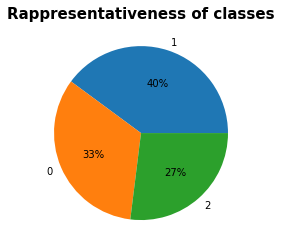

In [6]:
#checking classes rappresentativeness
rapr=round((df["target"].value_counts())/(df["target"].value_counts()).sum()*100, 2)
plt.pie(rapr, labels=rapr.index,autopct = '%0.0f%%')
plt.title("Rappresentativeness of classes" ,fontsize = 15, fontweight = "bold")
plt.show()

In [7]:
#check for duplicates
df.duplicated().unique() #we have only False values. It means that no line is a duplicate.

array([False])

---

### Data Exploration

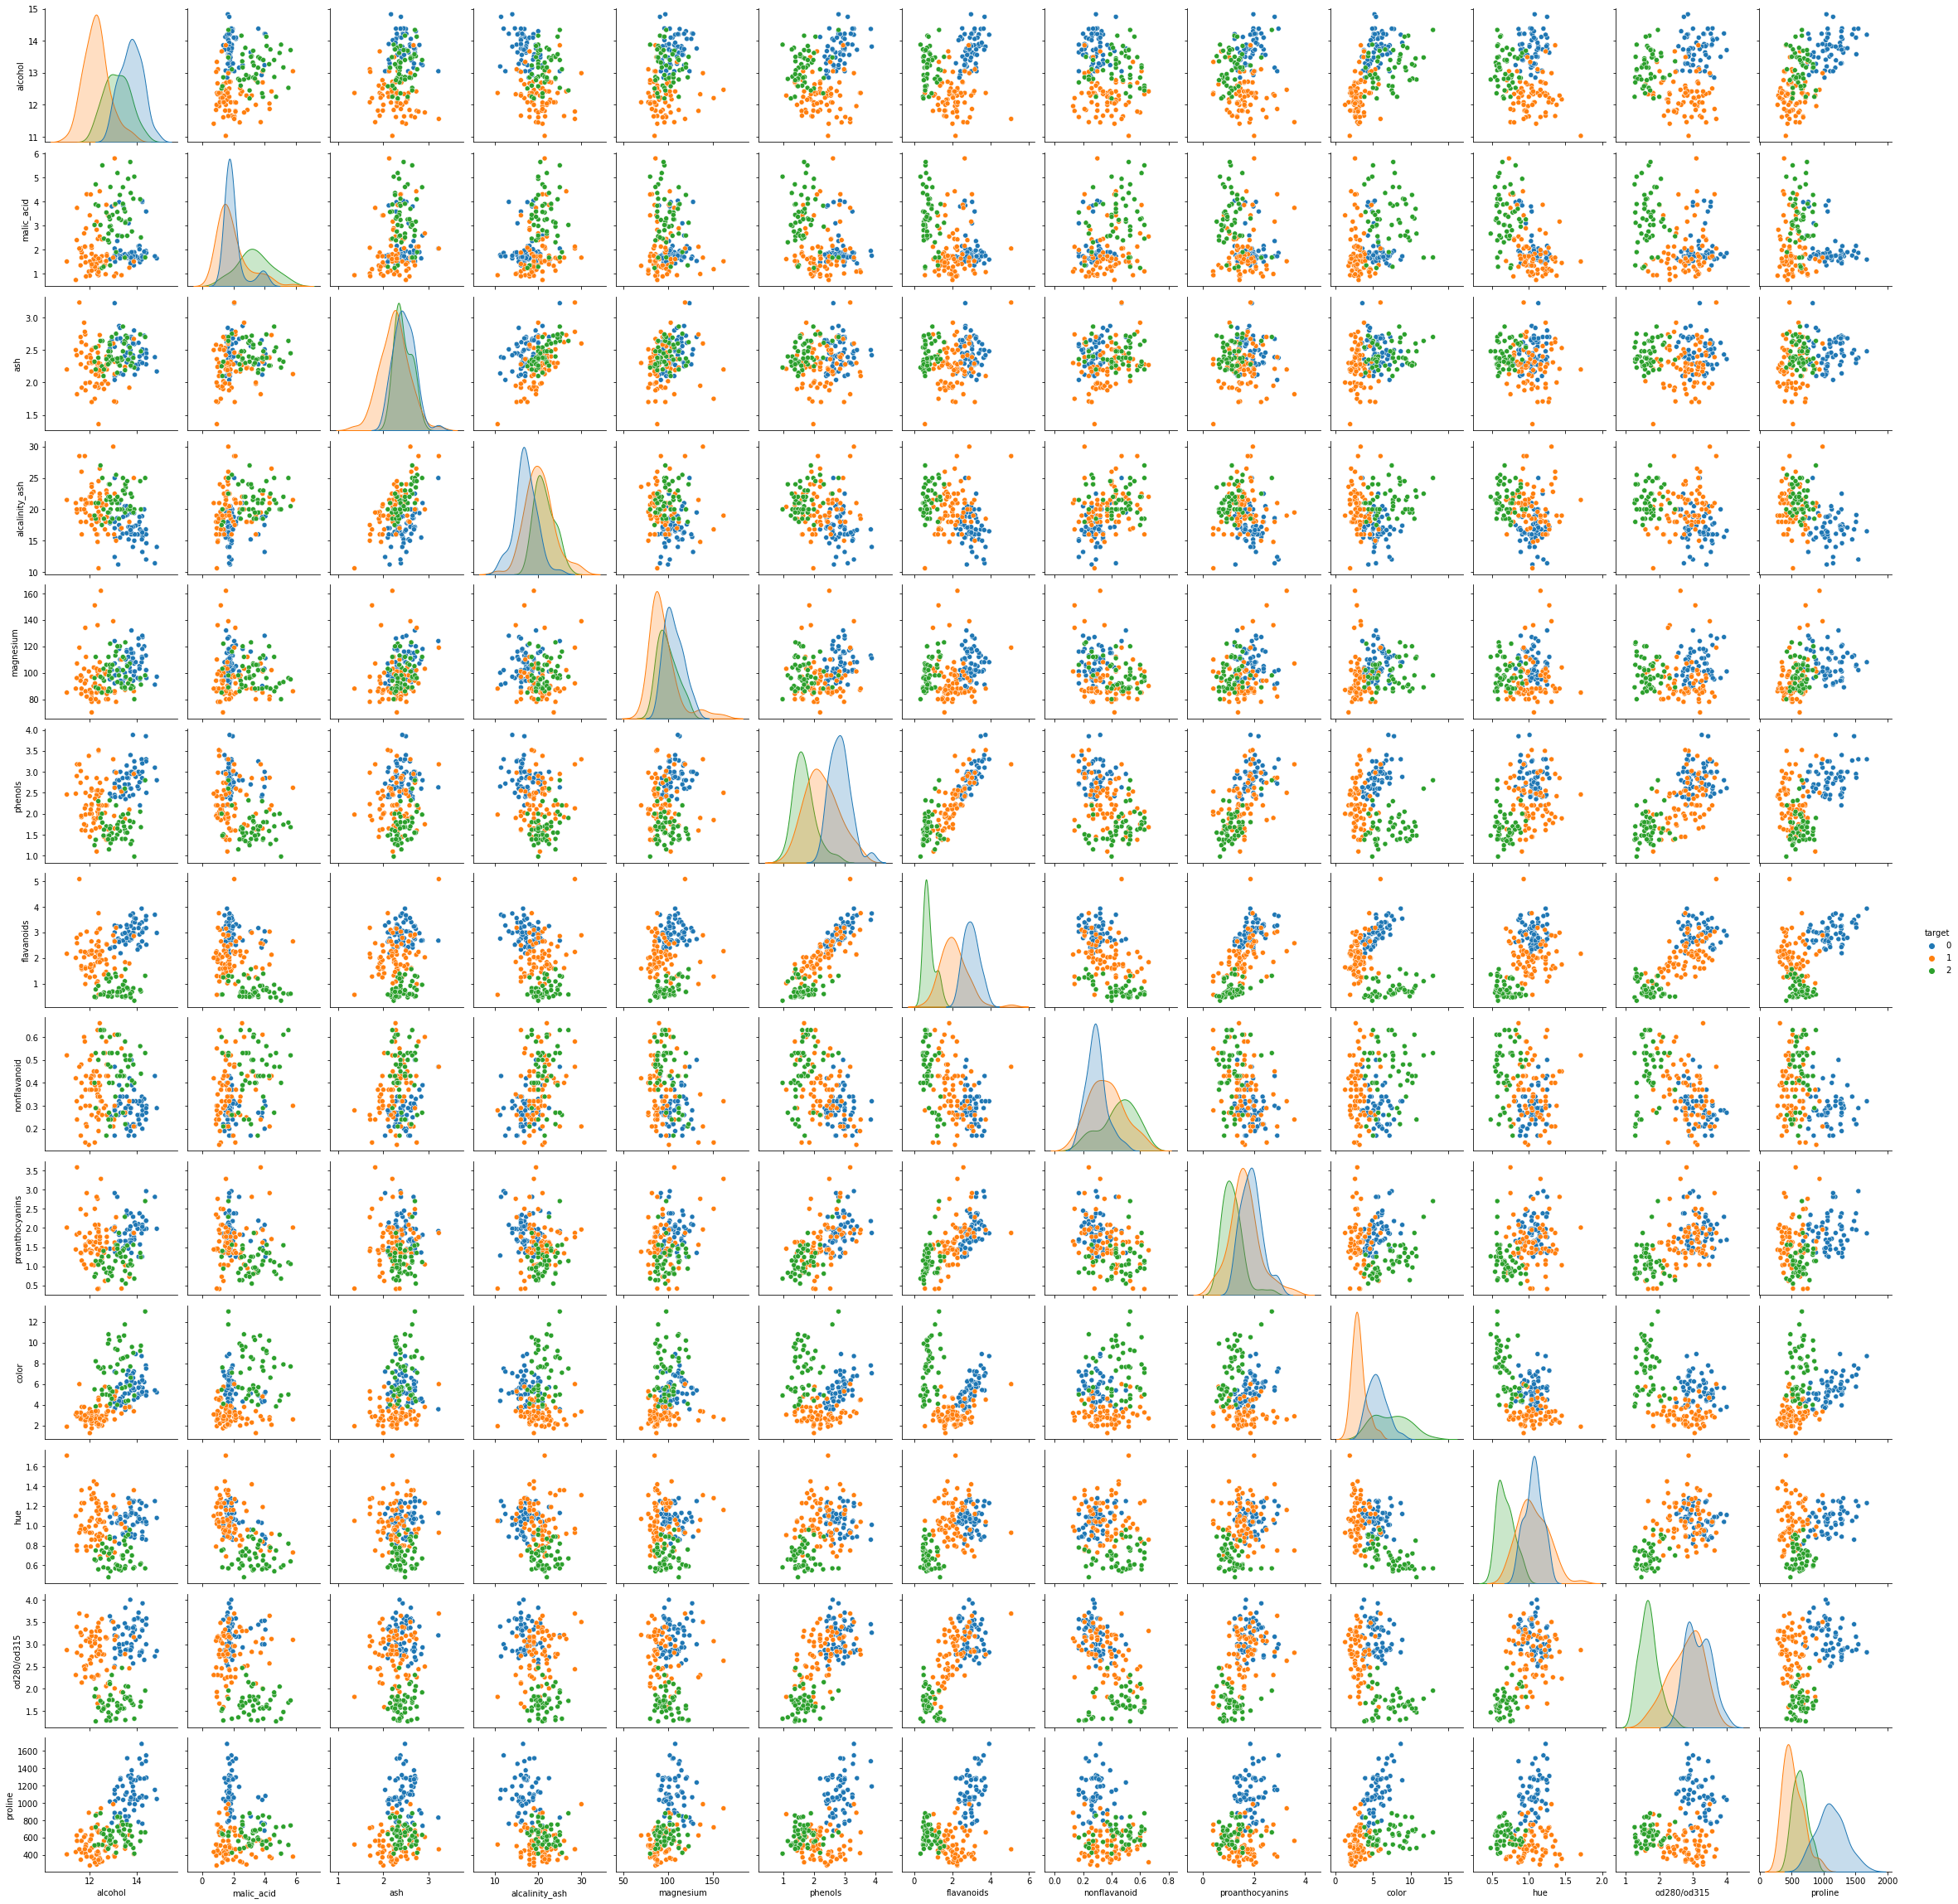

In [8]:
sns.pairplot(df, hue="target")
plt.show()

From this graph, we can notice some linear relations (like phenols ~ flavanoids), exponential relations (like proline ~ alcohol), and some variables which look uncorrelated to each other (like magnesium ~ alcalinity_ash).  
Furthermore, as we can see from distribution plots some variables differentiate the 3 classes better than others (for example flavanoids does it quite well while ash doesn't).

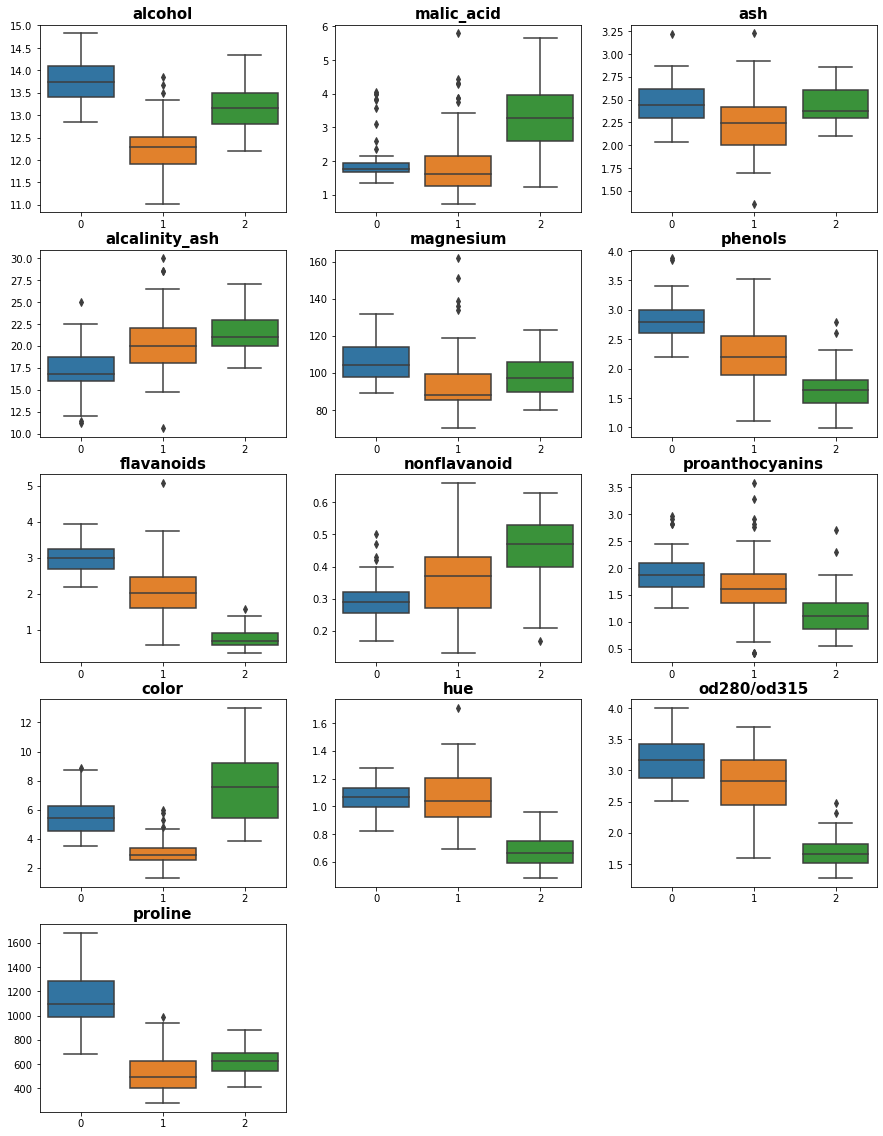

In [9]:
fig = plt.figure(figsize=(15,20))

for i, attribute in enumerate(df.columns[0:len(df.columns)-1]):
    #print(i, attribute)
    ax = fig.add_subplot(5,3,i+1)
    sns.boxplot(x="target", y=attribute, data=df)
    ax.set(xlabel=None, ylabel=None)
    plt.title(attribute ,fontsize = 15, fontweight = "bold")
    


In boxplots, we can find some observations that for some attributes (like magnesium or malic_acid)  present many points that are over the superior limiter of the boxplot.  
This means that the values of those observations are higher than the 75°quartile plus 1.5 times the interquartile range.  
Because I don't have enough knowledge to determine if they are outliers I'll keep them.

<AxesSubplot:>

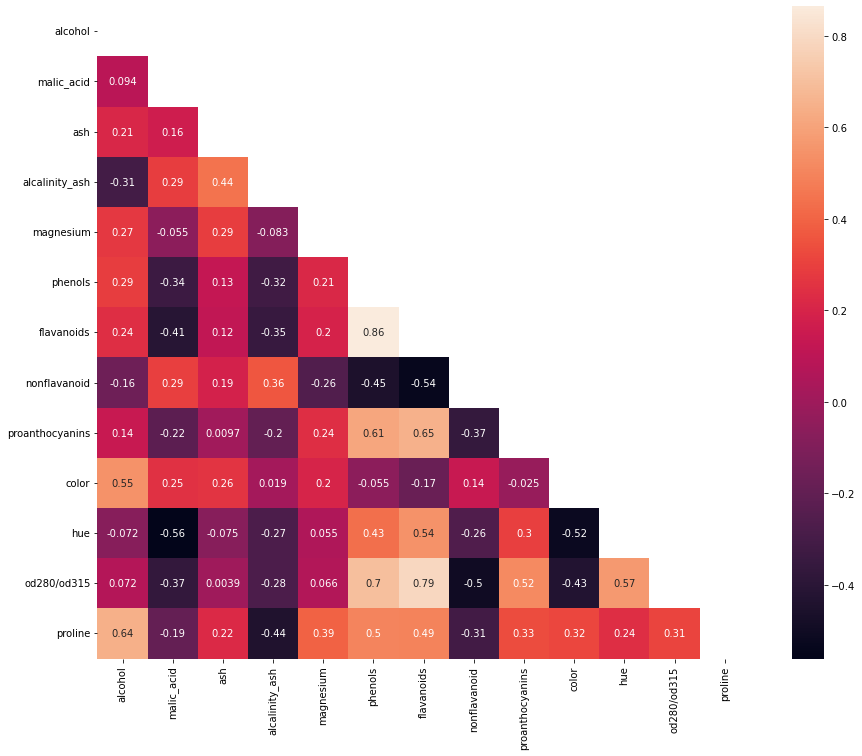

In [10]:
corr = df.corr() #Calculate the correlation of the above variables

fig = plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(corr, dtype=bool)) #code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html 
sns.heatmap(corr,mask=mask, square = True,annot=True) 

We see that there are variables linearly correlated (as phenols, flavanoids and nonflavanoid), but we don't have to worry about that because it won't influence our algorithms.

---

### Data preparation

Because of the heterogeneousness of the order of magnitude of the attributes I'll scale the data.  
I'll simulate that the objective of the project is to predict the class for future data. Because of that, I  will scale the data by using the mean and the standard deviation calculated only on the training dataset as the training set is supposed to be unknown at the moment.

In [38]:
# Start by dividing training and test sets
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=10, stratify=y)

In [39]:
# Scaling data by detracting the mean and devide by the standar deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# next 2 rows are a check if scaling went trough correctly
mean_std=pd.DataFrame({"Mean_train":round(pd.DataFrame(X_train).mean(),2),"Mean_test":round(pd.DataFrame(X_test).mean(),2),
                      "Std_train":round(pd.DataFrame(X_train).std(),2),"Std_test":round(pd.DataFrame(X_test).std(),2)})
print(mean_std)


    Mean_train  Mean_test  Std_train  Std_test
0          0.0       0.04        1.0      0.99
1         -0.0      -0.15        1.0      0.97
2          0.0       0.24        1.0      0.93
3          0.0       0.16        1.0      0.82
4         -0.0      -0.12        1.0      0.73
5          0.0       0.10        1.0      0.93
6         -0.0       0.04        1.0      0.99
7         -0.0      -0.02        1.0      0.86
8          0.0       0.15        1.0      0.79
9         -0.0       0.01        1.0      1.01
10         0.0      -0.05        1.0      0.92
11         0.0       0.13        1.0      0.94
12         0.0      -0.09        1.0      0.91


## Support Vector Machine

Because of the relatively little dataset I decided to apply SVM algorithm that should work well even with no big amount of data.

In [40]:
from  sklearn.svm import SVC #Support Vector Classifier
from  sklearn.model_selection import GridSearchCV
from  sklearn.metrics import confusion_matrix
from  sklearn.metrics import plot_confusion_matrix

Data is ready to be used to train a SVM algorithm.  
I'll first build a *basic* one, and after looking at the performance I'll try to optimise the parameters trough a Cross Validation.

In [41]:
classifier = SVC(random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

Let's check how it performed

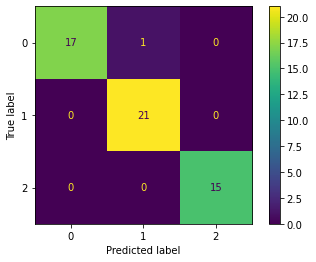

In [42]:
plot_confusion_matrix(classifier,
                      X_test,
                      y_test)

This result is a bit suspicious.  
I'll try to optimize anyways in order to see if we obtain different results.

Optimizing a Support Vector Machine consist in finding the best values for:  
* The **kernel function** can be any of the following:
 + linear
  + polynomial (caracterized by the *degree* parameter which detemines the maximum degree of the polinomial function to use on data
  + **rbf** (the default one and the one we are using)
  + sigmoid
- The parameter **C**, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly
- **gamma** (>0) defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected. 
  
  
*some sentences are taken from https://scikit-learn.org/stable/modules/svm.html

#### Let's optimise parameters

In [16]:
# setting the parameters we want to cross fit
params_grid= [
    {
        "C": [0.5, 1, 10, 100], #remember C > 0. The smaller C is, the more is the regularization (usefull dataset with much noise)
        "gamma":['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel":["rbf"]
    },
]

# setting the grid search cross validation
optimal_params = GridSearchCV(
        SVC(),
        params_grid,
        cv = 5,
        scoring="accuracy",
        verbose=0 ) #with this parameter setted =2 we see how the grid search, and the cross  validation works.
# fitting all the parameters combinations on data
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


We have the best parameters to use. Now let's use them to predict on the test set and see how well it works.

In [17]:
classifier = SVC(random_state=0, kernel="rbf", C=10, gamma="scale") #gamma and kernel have default values
classifier.fit(X_train, y_train)

SVC(C=10, random_state=0)

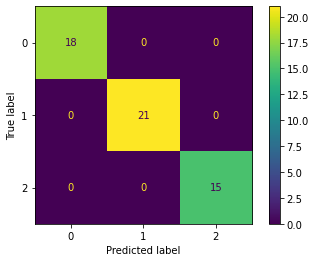

In [18]:
plot_confusion_matrix(classifier,
                      X_test,
                      y_test)

We obtained the same result as before (in fact we only changed the C parameter), but hopefully, this setting is more consistent.  
Those parameters were chosen with a cross-validation method that divided data into 5 groups and train-tested 5 times leaving each time one group out of the training to test on it.

---

### 2 dimensional example visualize what we did and better understand SVMs

Now I'll plot what we did.  
Because I'm able to create only 2 dimensional plot (and anyways we can't plot no more than 3 dimensional plots) I'll choose 2 variables that apparently, from the scatterplot, keep points diveded into groups. With this data I'll plot the point and the prediction areas. 

In [59]:
#info about the following code on https://www.youtube.com/watch?v=8A7L0GsBiLQ

#dividing data into training and test
dfX_train, dfX_test, dfy_train, dfy_test = split(df.drop("target", axis=1), df.target, test_size=0.3, shuffle=True, random_state=10, stratify=y)

# Selecting the 2 variables
train_flavanoids=dfX_train.flavanoids
train_proline=dfX_train.proline

# scaling
from sklearn.preprocessing import scale
train_scaled = scale(np.column_stack((train_flavanoids, train_proline)))

# finf and fit the optimal SVM
params_grid= [{"C": [0.5, 1, 10, 100], #remember C > 0. The smaller C is, the more is the regularization (usefull dataset with much noise)
        "gamma":['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel":["rbf"]},]

# setting the grid search cross validation
optimal_params = GridSearchCV(
        SVC(),
        params_grid,
        cv = 5,
        scoring="accuracy",
        verbose=0 ) #with this parameter setted =2 we see how the grid search, and the cross  validation works.

# fitting all the parameters combinations on data
optimal_params.fit(train_scaled, dfy_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


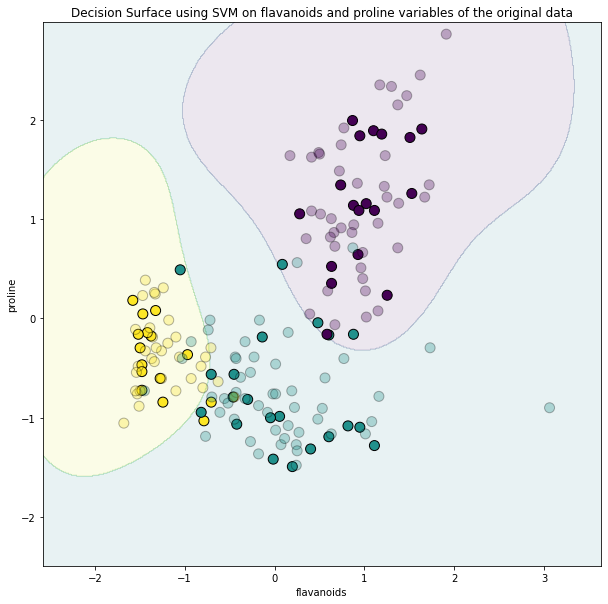

In [63]:
#traininf and fitting SVM with optimal parameters
clf_svm = SVC(random_state=0, C=10)
clf_svm.fit(train_scaled, dfy_train)

#scaling test set
test_flavanoids=scale(dfX_test.flavanoids)
test_proline=scale(dfX_test.proline)

# Now create a matrix of points that we can use to show the decision regions
# Creating it a +/- 1 larger in order to avoid haveing points on the edge of the plot area
x_min= test_flavanoids.min()-1
x_max= test_flavanoids.max()+2

y_min= test_proline.min()-1
y_max= test_proline.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.01),
                     np.arange(start=y_min,stop=y_max,step=0.01))

Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))

Z=Z.reshape(xx.shape)

#plotting
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)
ax.set_ylabel("proline")
ax.set_xlabel("flavanoids")
ax.set_title("Decision Surface using SVM on flavanoids and proline variables of the original data")

scatter = ax.scatter(test_flavanoids, test_proline, c=dfy_test, s=100, edgecolors="k", alpha=1)
scatter = ax.scatter(scale(train_flavanoids), scale(train_proline), c=dfy_train, s=100, edgecolors="k", alpha=0.3)

In the plot we can see from the background color the areas that the represent the prediction boundaries for future observations.  
The dark plot represent the test observations, while the more transparent ones are from the training dataset.

## Conclusion

We saw that by applying a Support Vector Machine to this data to classifiy new observations we obtain a good performance.  
SVM works really well with realtively small datasets and even with no optimisation permorfed well.  